## 금 주가
GC:CMX 과거 데이터

In [1]:
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

2024-03-29 13:47:26.513235: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-29 13:47:26.580438: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-29 13:47:27.056958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
DATA_PATH = "/home/leejieun/workspace/kaggle-notebooks/datasets/sahilwagh/gold-stock-prices/goldstock.csv"

In [15]:
def populate_missing_date_values(df):
  start_date = df['Date'][0].date()

  dates = df['Date']

  dataset = []
  num_days_in_future = 1

  for index, day in enumerate(dates):

    current_df_date = str(day.date())


    if (index == 0):
      open_price = df['Open'][index]
      day_step = [current_df_date, open_price]
      dataset.append(day_step)
      continue
    
    open_price = df['Open'][index]
    close_price = df['Close'][index - 1]

    current_date = str(start_date + datetime.timedelta(days = num_days_in_future))

    if (current_date != current_df_date):
      found_next_date = False

      while not found_next_date:
        if (current_date == current_df_date):
          found_next_date = True

          day_step = [current_date, open_price]
          dataset.append(day_step)
        else:
          day_step = [current_date, close_price]
          dataset.append(day_step)

          num_days_in_future += 1
          current_date = str(start_date + datetime.timedelta(days=num_days_in_future))
    else:
      day_step = [current_date, open_price]
      dataset.append(day_step)

    num_days_in_future += 1

  return dataset

In [19]:
df = pd.read_csv(DATA_PATH)
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date', ascending=True)

df.drop_duplicates(subset=['Date'], keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

df = populate_missing_date_values(df)

df = pd.DataFrame(df, columns=['Date', 'Open'])
df.head(10)

,Date,Open
0,2014-01-22,1240.5
1,2014-01-23,1235.1
2,2014-01-24,1264.3
3,2014-01-25,1264.5
4,2014-01-26,1264.5
5,2014-01-27,1269.9
6,2014-01-28,1254.9
7,2014-01-29,1255.8
8,2014-01-30,1267.2
9,2014-01-31,1244.0


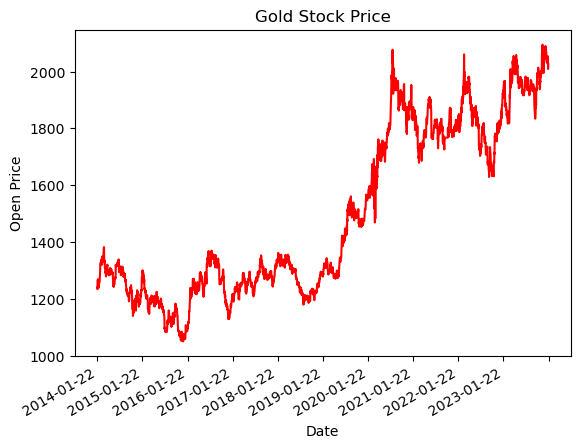

In [17]:
plt.plot(df['Date'], df['Open'], color='red')

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Gold Stock Price')
plt.show()